MAE: 0.300
Config: {'tree__ccp_alpha': np.float64(0.1), 'tree__random_state': 2024}
Train R² Score: 0.6999
Test R² Score: 0.7018
Mean Absolute Error: 0.2982222222222222
---------------------------


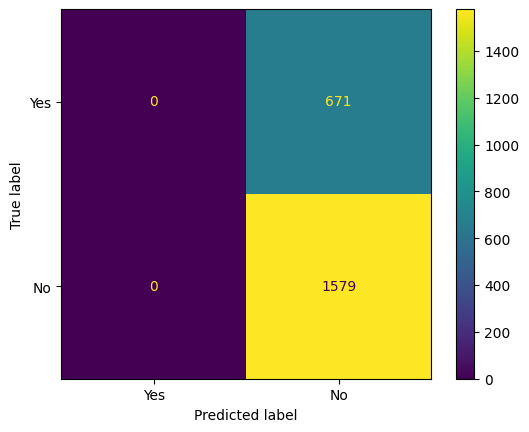

		Logistic Regression Classification Report:
		-----------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       671
           1       0.70      1.00      0.82      1579

    accuracy                           0.70      2250
   macro avg       0.35      0.50      0.41      2250
weighted avg       0.49      0.70      0.58      2250



/Users/caitincataldo/Documents/Coding/Machine Learning Class/Course 3 Project/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/caitincataldo/Documents/Coding/Machine Learning Class/Course 3 Project/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/caitincataldo/Documents/Coding/Machine Learning Class/Course 3 Project/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being

<Figure size 1400x2000 with 0 Axes>

Optimal Threshold: inf


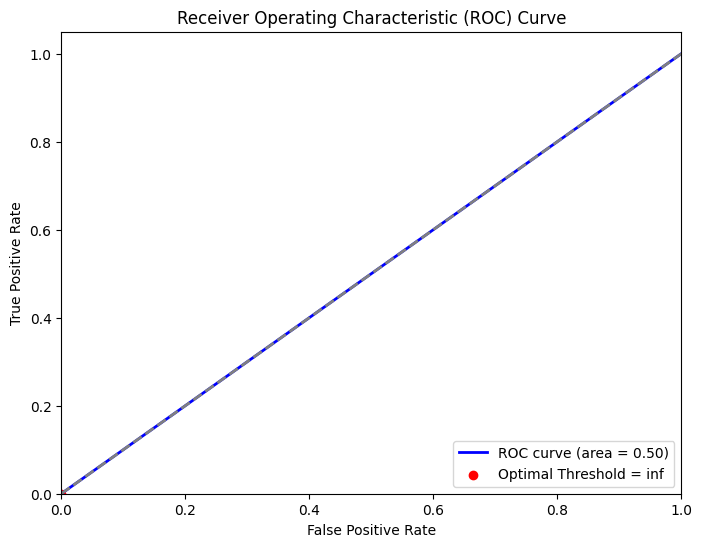

{'test_size': None,
 'random_state': 2024,
 'max_iter': 1000,
 'strategy': 'median',
 'scaler_name': None,
 'model_name': 'tree',
 'grid': {'start': 0.1, 'stop': 2.1, 'step': 0.1},
 'scoring': 'neg_mean_absolute_error',
 'cv': 5,
 'n_jobs': -1,
 'drop_cols': None,
 'n_neighbors': 3,
 'ccp_alpha': 0,
 'class_weight': None,
 'max_depth': None,
 'min_samples_split': None,
 'pipeline_results': {'mae': 0.2982222222222222,
  'mae_best_score': np.float64(-0.30014814814814816),
  'mae_best_params': {'tree__ccp_alpha': np.float64(0.1),
   'tree__random_state': 2024},
  'y_pred': array([1, 1, 1, ..., 1, 1, 1], shape=(2250,)),
  'pred_df':       Age  Gender MaritalStatus EducationLevel EmploymentStatus  AnnualIncome  \
  2642   62  Female       Widowed         Master          Retired        118314   
  2669   50  Female      Divorced       Bachelor          Student         48782   
  1366   47    Male       Married       Bachelor       Unemployed         63261   
  8972   19  Female       Widowed

In [1]:
from myproject.mypackage.pipeline import validateParams, runPipeline, find_outliers_z, modelDictionary, boxplotGrid
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv("synthetic_loan_data.csv")
df.drop(columns=['CustomerID','Name'], inplace=True)
df
X = df.drop(columns='LoanApproved')
y = df['LoanApproved']

runPipeline(X, y, parameters={'model_name': 'tree','test_size': None})


In [2]:
df = pd.read_csv("Credit.csv")

y = df['Credit']
X = df.drop(columns='Credit')

result = runPipeline(X, y, {'model_name': 'log_reg','max_iter': 10000})

MAE: 0.116
Config: {'ridge__max_iter': 1000, 'ridge__random_state': 2024}
Train R² Score: 0.0489
Test R² Score: 0.0440
Mean Absolute Error: 0.11647444485625368
---------------------------


In [3]:
df = pd.read_csv("Credit.csv")

y = df['Credit']
X = df.drop(columns='Credit')

result = runPipeline(X, y, {'model_name': 'log_reg','max_iter': 10000,'test_size': .4,'scaler':'min_max_scaler'})


MAE: 0.116
Config: {'ridge__max_iter': 1000, 'ridge__random_state': 2024}
Train R² Score: 0.0489
Test R² Score: 0.0440
Mean Absolute Error: 0.11647444485625368
---------------------------


In [4]:
df = pd.read_csv("Credit.csv")
for index, col in enumerate(df.drop(columns='Credit').columns):
    z_scores, mask, median = find_outliers_z(df, col)
    #print(f"{col}: {find_outliers_z(df, col)[1].count()[0]}")
    #print(find_outliers_z(df, col)[2])
    df.loc[df[col].index[mask], col] = np.nan

y = df['Credit']
X = df.drop(columns='Credit')

result = runPipeline(X, y, {'model_name': 'knn','max_iter': 10000,'n_neighbors': 4,'test_size': .4})

MAE: 0.105
Config: {'ridge__max_iter': 1000, 'ridge__random_state': 2024}
Train R² Score: 0.1419
Test R² Score: 0.1528
Mean Absolute Error: 0.10416190376854877
---------------------------


In [5]:
df = pd.read_csv("Credit.csv")
for index, col in enumerate(df.drop(columns='Credit').columns):
    z_scores, mask, median = find_outliers_z(df, col)
    #print(f"{col}: {find_outliers_z(df, col)[1].count()[0]}")
    #print(find_outliers_z(df, col)[2])
    df.loc[df[col].index[mask], col] = np.nan

y = df['Credit']
X = df.drop(columns='Credit')

result = runPipeline(X, y, {'model_name': 'tree','max_iter': 10000,'test_size': .8, 'ccp_alpha': 0, 'grid': {'start': .00, 'stop': .0025, 'step': .00025, 'class_weight': 'balanced'}})

MAE: 0.105
Config: {'ridge__max_iter': 1000, 'ridge__random_state': 2024}
Train R² Score: 0.1419
Test R² Score: 0.1528
Mean Absolute Error: 0.10416190376854877
---------------------------


In [6]:
df = sns.load_dataset("titanic")
null_counts = df.isnull().sum()
total_counts = df.shape[0]

df = df.drop('alive', axis=1)

X = df.drop(columns='survived')
y = df['survived']

model_a = runPipeline(X, y, showChart=False, parameters={'model_name': 'svc'})
model_b = runPipeline(X, y, showChart=False, parameters={'model_name': 'tree','test_size': .3,'min_samples_split': [6],'grid': {'start': .00, 'stop': .0025, 'step': .00025}})

modelDictionary()

MAE: 0.332
Config: {'svc__max_iter': 1000, 'svc__random_state': 2024}
Train R² Score: 0.6854
Test R² Score: 0.6754
Mean Absolute Error: 0.3246268656716418
---------------------------
MAE: 0.199
Config: {'tree__ccp_alpha': np.float64(0.002), 'tree__min_samples_split': 6, 'tree__random_state': 2024}
Train R² Score: 0.9117
Test R² Score: 0.8582
Mean Absolute Error: 0.1417910447761194
---------------------------


{'models': dict_keys(['ridge', 'lasso', 'log_reg', 'nb', 'lin_reg', 'knn', 'tree', 'reg_tree', 'svc']),
 'scalers': dict_keys(['std_scaler', 'min_max_scaler']),
 'prob_models': ['log_reg', 'nb', 'lin_reg', 'knn', 'tree'],
 'closed_form_models': ['nb', 'lin_reg', 'knn', 'tree', 'reg_tree']}

MAE: 0.300
Config: {'tree__ccp_alpha': np.float64(0.1), 'tree__random_state': 2024}
Train R² Score: 0.7000
Test R² Score: 0.7011
Mean Absolute Error: 0.29888888888888887
---------------------------


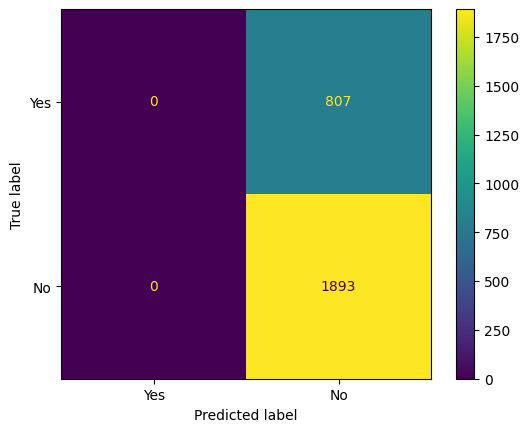

		Logistic Regression Classification Report:
		-----------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       807
           1       0.70      1.00      0.82      1893

    accuracy                           0.70      2700
   macro avg       0.35      0.50      0.41      2700
weighted avg       0.49      0.70      0.58      2700



/Users/caitincataldo/Documents/Coding/Machine Learning Class/Course 3 Project/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/caitincataldo/Documents/Coding/Machine Learning Class/Course 3 Project/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/caitincataldo/Documents/Coding/Machine Learning Class/Course 3 Project/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being

<Figure size 1400x2000 with 0 Axes>

Optimal Threshold: inf


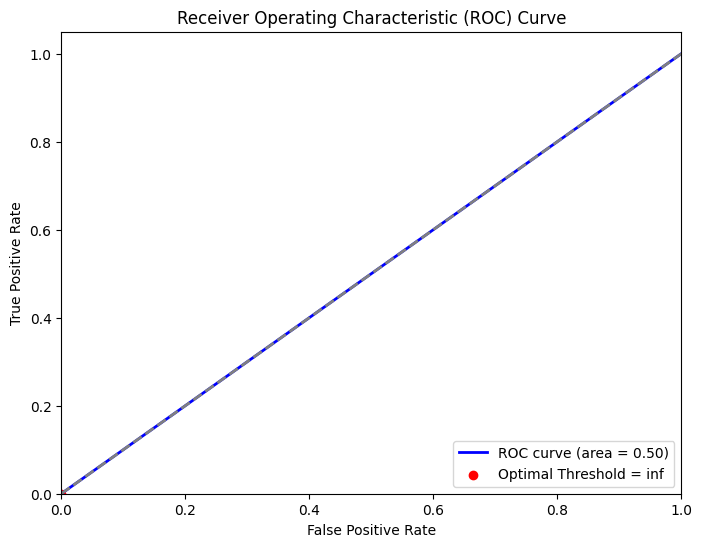

LoanApproved
Yes    6303
No     2697
Name: count, dtype: int64

In [7]:
df = pd.read_csv("synthetic_loan_data.csv")
df.drop(columns=['CustomerID','Name'], inplace=True)
y = df['LoanApproved']
X = df.drop(columns='LoanApproved')

result = runPipeline(X, y, showChart=True, parameters={'model_name': 'tree'})
df['LoanApproved'].value_counts()

In [8]:
print(modelDictionary())
runPipeline(X, y, {'model_name': 'log_reg'})

{'models': dict_keys(['ridge', 'lasso', 'log_reg', 'nb', 'lin_reg', 'knn', 'tree', 'reg_tree', 'svc']), 'scalers': dict_keys(['std_scaler', 'min_max_scaler']), 'prob_models': ['log_reg', 'nb', 'lin_reg', 'knn', 'tree'], 'closed_form_models': ['nb', 'lin_reg', 'knn', 'tree', 'reg_tree']}
MAE: 0.420
Config: {'ridge__max_iter': 1000, 'ridge__random_state': 2024}
Train R² Score: 0.0043
Test R² Score: -0.0017
Mean Absolute Error: 0.4189912405423035
---------------------------


{'test_size': 0.3,
 'random_state': 2024,
 'max_iter': 1000,
 'strategy': 'median',
 'scaler_name': None,
 'model_name': 'ridge',
 'grid': {'start': 0.1, 'stop': 2.1, 'step': 0.1},
 'scoring': 'neg_mean_absolute_error',
 'cv': 5,
 'n_jobs': -1,
 'drop_cols': None,
 'n_neighbors': 3,
 'ccp_alpha': 0,
 'class_weight': None,
 'max_depth': None,
 'min_samples_split': None,
 'pipeline_results': {'mae': 0.4189912405423035,
  'mae_best_score': np.float64(-0.41965804310974136),
  'mae_best_params': {'ridge__max_iter': 1000, 'ridge__random_state': 2024},
  'y_pred': array([0.7314712 , 0.69750139, 0.67276408, ..., 0.68625694, 0.74024105,
         0.73898199], shape=(2700,)),
  'pred_df':       Age  Gender MaritalStatus EducationLevel EmploymentStatus  AnnualIncome  \
  2642   62  Female       Widowed         Master          Retired        118314   
  2669   50  Female      Divorced       Bachelor          Student         48782   
  1366   47    Male       Married       Bachelor       Unemployed 

In [9]:
from sklearn.datasets import load_iris
iris=load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)


#x = df[['sepal length (cm)', 'petal length (cm)']]
#y = iris.data.Species

df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
